(rv)=

# Radial velocity fitting

In [1]:
import sys
sys.version

'3.9.5 | packaged by conda-forge | (default, Jun 19 2021, 00:27:35) \n[Clang 11.1.0 ]'

In [2]:
import exoplanet
print(f"exoplanet.__version__ = '{exoplanet.__version__}'")

WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


exoplanet.__version__ = '0.5.1'


Fitting RVs for Earth and Jupiter

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import exoplanet as xo
import pymc3 as pm
import pymc3_ext as pmx
from astropy import units as u
from astropy.constants import M_earth, M_sun
from simulate_data import *

import matplotlib 
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18)

T_subtract = 2454000
# orbital parameters from https://www.princeton.edu/~willman/planetary_systems/Sol/
# BJD determined by converting values above using https://ssd.jpl.nasa.gov/tc.cgi#top

P_earth = 365.256
e_earth = 0.0167
Tper_earth= 2454115.5208333 - T_subtract
omega_earth = np.radians(102.9)
Omega_earth = np.radians(0.0)
inclination_earth = np.radians(45.0)
m_earth = 1*3.00273e-6 #units m_sun



P_jup = 4327.631
e_jup = 0.0484
Tper_jup = 2455633.7215278- T_subtract
omega_jup = np.radians(274.3) - 2*np.pi
Omega_jup = np.radians(100.4)
inclination_jup = np.radians(0) + inclination_earth
m_jup = 317.83*3.00273e-6 #units m_sun




In [14]:
orbit_params_earth = [P_earth, e_earth, Tper_earth, omega_earth, Omega_earth, inclination_earth, m_earth]
orbit_params_jup = [P_jup, e_jup, Tper_jup, omega_jup, Omega_jup, inclination_jup, m_jup]

orbit_params = [orbit_params_earth, orbit_params_jup]

################

orbit_params_earth2 = [P_earth, e_earth, Tper_earth, omega_earth, Omega_earth-100, inclination_earth, m_earth]
orbit_params_jup2 = [P_jup, e_jup, Tper_jup, omega_jup, Omega_jup+100, inclination_jup, m_jup]

orbit_params2 = [orbit_params_earth2, orbit_params_jup2]


times_observed_astrometry = []
t_0 = int(Tper_earth)
for ii in range(t_0, t_0+1800):
    if ii % 50 == 0:
        times_observed_astrometry.append(ii)

n_planets = 2
t_dur_rv = 3650
n_obs_rv = 3000
sigma_rv = 0.0

sigma_theta = 0.0
sigma_rho = 0.0
plx = 0.1



################

times, rv_results, theta_results, rho_results = simulate_data(
    n_planets, 
    sigma_rv, 
    sigma_theta,
    sigma_rho,
    plx,
    orbit_params,
    t_dur_rv = t_dur_rv,
    n_obs_rv = n_obs_rv,
    times_observed_astrometry = times_observed_astrometry
    )


[[times_rv, times_observed_rv, times_astrometry, times_observed_astrometry],
     [rv_orbit, rv_orbit_sum, rv_sim, rv_sim_sum],
     [theta_orbit, theta_orbit_sum, theta_sim, theta_sim_sum],
     [rho_orbit, rho_orbit_sum, rho_sim, rho_sim_sum]]  = times, rv_results, theta_results, rho_results


################

times, rv_results, theta_results, rho_results = simulate_data(
    n_planets, 
    sigma_rv, 
    sigma_theta,
    sigma_rho,
    plx,
    orbit_params2,
    t_dur_rv = t_dur_rv,
    n_obs_rv = n_obs_rv,
    times_observed_astrometry = times_observed_astrometry
    )


[[times_rv2, times_observed_rv2, times_astrometry2, times_observed_astrometry2],
     [rv_orbit2, rv_orbit_sum2, rv_sim2, rv_sim_sum2],
     [theta_orbit2, theta_orbit_sum2, theta_sim2, theta_sim_sum2],
     [rho_orbit2, rho_orbit_sum2, rho_sim2, rho_sim_sum2]]  = times, rv_results, theta_results, rho_results


In [27]:
print(np.isclose(theta_orbit_sum.all(), theta_orbit_sum2.all())) 
print(np.isclose(rho_orbit_sum.all(), rho_orbit_sum2.all())) 


True
True


In [28]:
theta_orbit_sum = np.round(theta_orbit_sum, 9)
rho_orbit_sum = np.round(rho_orbit_sum, 9)


In [29]:
theta_orbit_sum2 = np.round(theta_orbit_sum2, 9)
rho_orbit_sum2 = np.round(rho_orbit_sum2, 9)


Text(0, 0.5, "$\\rho$  ['']")

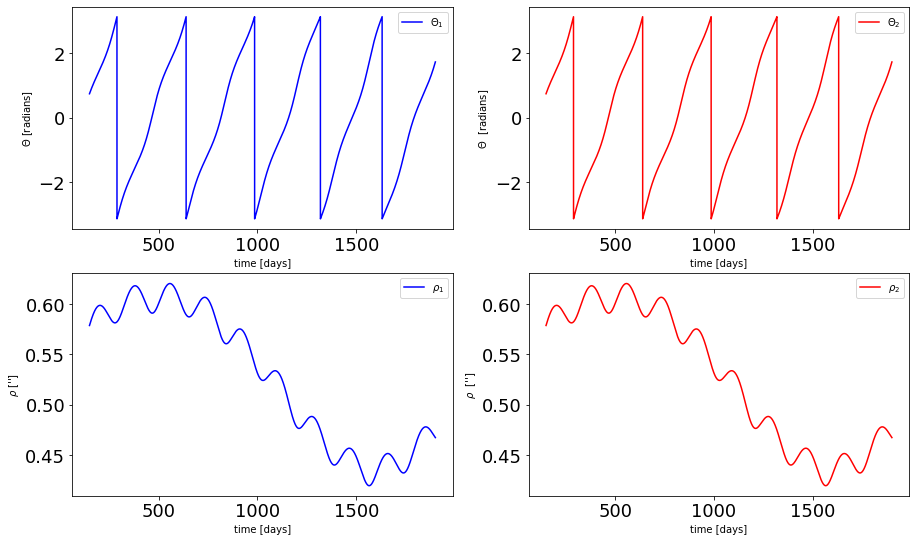

In [39]:
fig, ax = plt.subplots(2,2, figsize = [15,9])

ax[0][0].plot(times_astrometry, theta_orbit_sum, label  = r"$\Theta_1$", color = 'b')
ax[0][1].plot(times_astrometry, theta_orbit_sum2, label  = r"$\Theta_2$", color = 'r')
ax[0][0].legend()
ax[0][1].legend()
ax[0][0].set_xlabel("time [days]")
ax[0][1].set_xlabel("time [days]")
ax[0][0].set_ylabel(r"$\Theta$ [radians]")
ax[0][1].set_ylabel(r"$\Theta$  [radians]")


ax[1][0].plot(times_astrometry, rho_orbit_sum, label  = r"$\rho_1$", color = 'b')
ax[1][1].plot(times_astrometry, rho_orbit_sum2, label  = r"$\rho_2$", color = 'r')
ax[1][0].legend()
ax[1][1].legend()
ax[1][0].set_xlabel("time [days]")
ax[1][1].set_xlabel("time [days]")
ax[1][0].set_ylabel(r"$\rho$ ['']")
ax[1][1].set_ylabel(r"$\rho$  ['']")


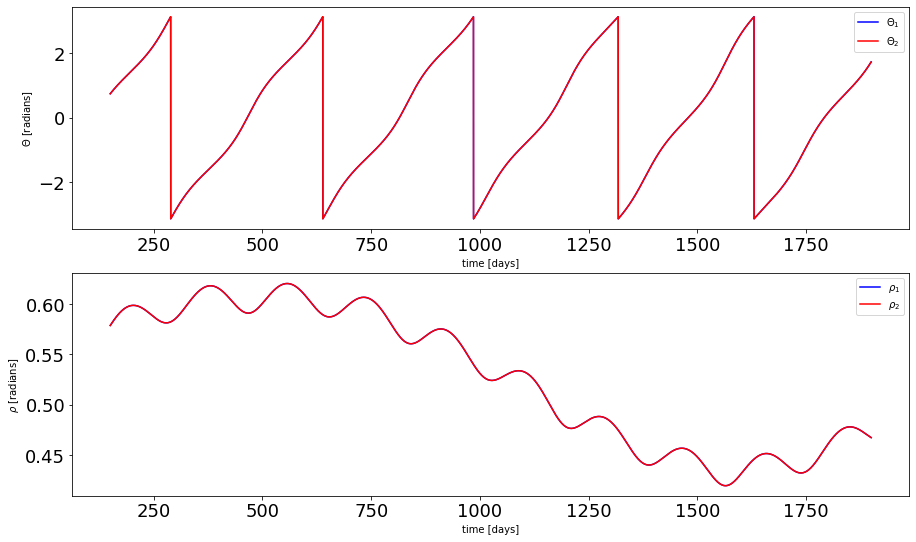

In [40]:
fig, ax = plt.subplots(2, 1, figsize = [15,9])

ax[0].plot(times_astrometry, theta_orbit_sum, label  = r"$\Theta_1$", color = 'b')
ax[0].plot(times_astrometry, theta_orbit_sum2, label  = r"$\Theta_2$", color = 'r')
ax[0].set_ylabel(r"$\Theta$ [radians]")
ax[0].set_xlabel("time [days]")
ax[0].legend()

ax[1].plot(times_astrometry, rho_orbit_sum, label  = r"$\rho_1$", color = 'b')
ax[1].plot(times_astrometry, rho_orbit_sum2, label  = r"$\rho_2$", color = 'r')
ax[1].set_ylabel(r"$\rho$ [radians]")
ax[1].set_xlabel("time [days]")
ax[1].legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


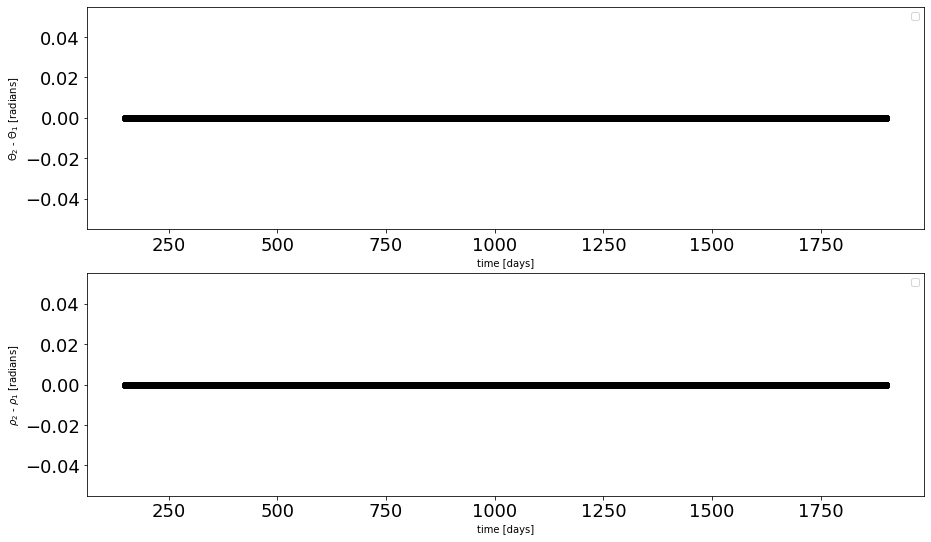

In [41]:
fig, ax = plt.subplots(2, 1, figsize = [15,9])
ax[0].plot(times_astrometry, theta_orbit_sum2 - theta_orbit_sum, 'o', color = 'k')
ax[0].set_xlabel("time [days]")
ax[0].set_ylabel(r"$\Theta_2$ - $\Theta_1$ [radians]")
ax[0].legend()

ax[1].plot(times_astrometry, rho_orbit_sum2 - rho_orbit_sum, 'o', color = 'k')
ax[1].set_xlabel("time [days]")
ax[1].set_ylabel(r"$\rho_2$ - $\rho_1$ [radians]")
ax[1].legend()